<h1 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>Evaluating Soil Health Compliance with Agronomic Standards</h1>

---

<h4 style='font-size: 18px;'>1.1: Introduction</h4>


Soil health is a foundational pillar in sustaining high and consistent crop productivity, particularly in maize cultivation, which demands specific nutrient and pH conditions for optimal growth. Healthy soils provide essential nutrients, support root development, and improve water retention, all of which directly influence yield potential. However, due to continuous cropping, poor management practices, and environmental factors, soils often become depleted or imbalanced over time. To ensure efficient fertilizer use and targeted soil amendments, it is crucial to evaluate whether current soil nutrient levels align with agronomic recommendations established for maize production. This analysis aims to assess the compliance of various soil parameters—including both macro- and micronutrients as well as soil pH and organic matter—with their respective target values. By identifying statistically significant deviations from these benchmarks, the study provides evidence-based insights to guide interventions for restoring soil fertility and enhancing crop performance.

<h4 style='font-size: 18px;'>1.2: Problem Statement</h4>

Soil health plays a critical role in determining the productivity and sustainability of crop production systems, particularly for maize cultivation. In many farming regions, however, soil nutrient imbalances and suboptimal conditions often go undetected due to a lack of data-driven assessments. In this context, the present analysis addresses a pressing need to evaluate whether the soils in the studied agricultural area meet established agronomic benchmarks for key soil health parameters. The concern lies in the possibility that essential macro- and micronutrients such as nitrogen, phosphorus, potassium, calcium, and magnesium, as well as soil pH and organic matter content, may be present in concentrations that deviate significantly from levels recommended for optimal maize growth. These deviations, if significant, can compromise crop development, nutrient uptake efficiency, and overall yield potential. The analytical challenge is to rigorously assess whether the observed mean levels of these soil parameters across the farms under study align with the expected standards or suggest a trend of deficiency or excess that warrants further agronomic intervention. This assessment is essential for guiding informed decisions on soil management and fertility restoration in maize-based production systems.

<h4 style='font-size: 18px;'>1.3: Dataset Overview</h4>

The dataset used in this analysis consists of **30 simulated soil samples**, designed to closely represent real-world farm conditions commonly found in maize-growing regions. Each sample captures critical indicators of soil health, focusing on parameters that influence maize growth, nutrient availability, and long-term soil fertility. These include a mix of **macro- and micronutrients**, organic matter content, and soil pH. The goal of the dataset is to emulate actual variability observed in field conditions, enabling a robust analysis of how current soil characteristics align with agronomic recommendations.

*The table below outlines the specific soil health parameters included in the dataset, along with their corresponding measurement units:*

<table style="border-collapse: collapse; width: 90%; text-align: left; font-family: Arial, sans-serif;" border="1" cellpadding="6" cellspacing="0">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th style="padding: 8px;">Parameter</th>
      <th style="padding: 8px;">Unit</th>
      <th style="padding: 8px;">Category</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px;">Soil pH</td>
      <td style="padding: 8px;">pH Scale</td>
      <td style="padding: 8px;">General Property</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Organic Matter</td>
      <td style="padding: 8px;">%</td>
      <td style="padding: 8px;">General Property</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Nitrogen</td>
      <td style="padding: 8px;">%</td>
      <td style="padding: 8px;">Macronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Phosphorus</td>
      <td style="padding: 8px;">mg/kg</td>
      <td style="padding: 8px;">Macronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Potassium</td>
      <td style="padding: 8px;">cmol/kg</td>
      <td style="padding: 8px;">Macronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Calcium</td>
      <td style="padding: 8px;">cmol/kg</td>
      <td style="padding: 8px;">Macronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Magnesium</td>
      <td style="padding: 8px;">cmol/kg</td>
      <td style="padding: 8px;">Macronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Sulfur</td>
      <td style="padding: 8px;">mg/kg</td>
      <td style="padding: 8px;">Micronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Zinc</td>
      <td style="padding: 8px;">mg/kg</td>
      <td style="padding: 8px;">Micronutrient</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Iron</td>
      <td style="padding: 8px;">mg/kg</td>
      <td style="padding: 8px;">Micronutrient</td>
    </tr>
  </tbody>
</table>


<h1 style='font-size: 18px;  font-weight: 600'>2.0: Import Required Libraries</h1>

In [78]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import shapiro, levene, skew, kurtosis 
pd.set_option('display.max_columns', 9)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("...Libraries Loaded Successfully....")

...Libraries Loaded Successfully....


<h1 style='font-size: 18px; font-weight: 600'>3.0: Import and Preprocessing Dataset</h1>

In [79]:
filepath = "./Datasets/soil health dataset.csv"
df = pd.read_csv(filepath)
display(df.head())

,Plot,pH,Organic Matter (%),Nitrogen (%),...,Magnesium (cmol/kg),Sulfur (mg/kg),Zinc (mg/kg),Iron (mg/kg)
0,Plot 3,6.03,2.69,0.31,...,1.51,7.77,1.00,4.06
1,Plot 4,5.92,2.95,0.18,...,1.76,7.25,0.71,5.97
2,Plot 1,5.42,2.20,0.20,...,1.81,9.75,1.09,4.83
3,Plot 3,6.49,1.97,0.21,...,1.53,8.22,1.14,6.47
4,Plot 3,6.44,2.91,0.17,...,1.41,9.44,1.01,5.61


<h1 style='font-size: 18px; font-weight: 600'>4.0: Exploratory Data Analysis </h1>

Now, let’s move into Exploratory Data Analysis (EDA) — an important step where we take a closer look at our dataset to understand its structure, identify patterns, detect anomalies, and get a sense of the overall distribution of soil parameters. This will help us gain valuable insights and guide the direction of our statistical tests and interpretations.

<h2 style='font-size: 17px; font-weight: 600'>4.1: Dataset Informartion Overviews</h2>


In [53]:
df.shape

(30, 11)

In [54]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Plot
--------------- pH
--------------- Organic Matter (%)
--------------- Nitrogen (%)
--------------- Phosphorus (mg/kg)
--------------- Potassium (cmol/kg)
--------------- Calcium (cmol/kg)
--------------- Magnesium (cmol/kg)
--------------- Sulfur (mg/kg)
--------------- Zinc (mg/kg)
--------------- Iron (mg/kg)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plot                 30 non-null     object 
 1   pH                   30 non-null     float64
 2   Organic Matter (%)   30 non-null     float64
 3   Nitrogen (%)         30 non-null     float64
 4   Phosphorus (mg/kg)   30 non-null     float64
 5   Potassium (cmol/kg)  30 non-null     float64
 6   Calcium (cmol/kg)    30 non-null     float64
 7   Magnesium (cmol/kg)  30 non-null     float64
 8   Sulfur (mg/kg)       30 non-null     float64
 9   Zinc (mg/kg)         30 non-null     float64
 10  Iron (mg/kg)         30 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.7+ KB


<h4 style='font-size: 15px; font-weight: 600'>4.1.2: Columns Summary</h4>

In [15]:
def column_summary(df):
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Plot,object,0,30,4,"{'Plot 4': 10, 'Plot 3': 9, 'Plot 2': 6, 'Plot..."
1,pH,float64,0,30,30,"{6.028585950273758: 1, 5.922775148675869: 1, 7..."
2,Organic Matter (%),float64,0,30,30,"{2.6874553264215453: 1, 2.9527044155794444: 1,..."
3,Nitrogen (%),float64,0,30,30,"{0.3111688876088002: 1, 0.1823882758479787: 1,..."
4,Phosphorus (mg/kg),float64,0,30,30,"{10.90587265306702: 1, 9.66787818329787: 1, 8...."
5,Potassium (cmol/kg),float64,0,30,30,"{0.1953283758898336: 1, 0.2661581304170976: 1,..."
6,Calcium (cmol/kg),float64,0,30,30,"{4.92238310839403: 1, 3.948201575348533: 1, 4...."
7,Magnesium (cmol/kg),float64,0,30,30,"{1.5095075535310662: 1, 1.7554099589807215: 1,..."
8,Sulfur (mg/kg),float64,0,30,30,"{7.771151942509977: 1, 7.248847410189239: 1, 8..."
9,Zinc (mg/kg),float64,0,30,30,"{0.9976650548655678: 1, 0.7081659039238215: 1,..."


<h4 style='font-size: 15px; font-weight: 600'>4.1.3: Handling Duplicates Values</h4>

In [16]:
def handle_duplicates(df):
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        df.drop_duplicates(inplace=True)
        print(f"Found and removed {duplicate_count} duplicate rows successfully.")
    else:
        print("No duplicate rows found in the dataset.")


handle_duplicates(df)

No duplicate rows found in the dataset.


<h4 style='font-size: 15px;  font-weight: 600'>4.1.4: Checking Missing Values</h4>

Checking for missing values is a crucial step in data analysis to assess the completeness and reliability of the dataset. This involves identifying any columns with null or empty entries, which may affect the accuracy of statistical and machine learning models.

In [56]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Plot,0,0.00
1,pH,0,0.00
2,Organic Matter (%),0,0.00
3,Nitrogen (%),0,0.00
4,Phosphorus (mg/kg),0,0.00
5,Potassium (cmol/kg),0,0.00
6,Calcium (cmol/kg),0,0.00
7,Magnesium (cmol/kg),0,0.00
8,Sulfur (mg/kg),0,0.00
9,Zinc (mg/kg),0,0.00


<h4 style='font-size: 15px;  font-weight: 600'>4.1.5: Exploring Invalid Entries Dtypes</h4>

Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [81]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)

,String,Missing,Datetime,Other,Numeric
Plot,100.00%,-,-,-,-
pH,-,-,-,-,100.00%
Organic Matter (%),-,-,-,-,100.00%
Nitrogen (%),-,-,-,-,100.00%
Phosphorus (mg/kg),-,-,-,-,100.00%
Potassium (cmol/kg),-,-,-,-,100.00%
Calcium (cmol/kg),-,-,-,-,100.00%
Magnesium (cmol/kg),-,-,-,-,100.00%
Sulfur (mg/kg),-,-,-,-,100.00%
Zinc (mg/kg),-,-,-,-,100.00%


<h2 style='font-size: 17px;  font-weight: 600'>4.2: Detection and Handling Outliers</h2>

An outlier is a data point that significantly deviates from the rest of the dataset, appearing as an unusually high or low value. Outliers may arise from errors, data entry mistakes, or natural variations, and can distort statistical analysis and machine learning models. To maintain data integrity, outliers should be detected using methods like Z-scores, IQR, or visual tools (e.g., box plots), and then handled appropriately.

<h4 style='font-size: 15px;  font-weight: 600'>4.2.1: Visualize Outliers Using Boxplots</h4>

To gain a more visual and intuitive understanding of how outliers are distributed, we can use **boxplots**. Boxplots not only show the spread and center of the data but also clearly highlight outliers as individual points outside the whiskers, making it easy to see which variables and groups have more extreme values.

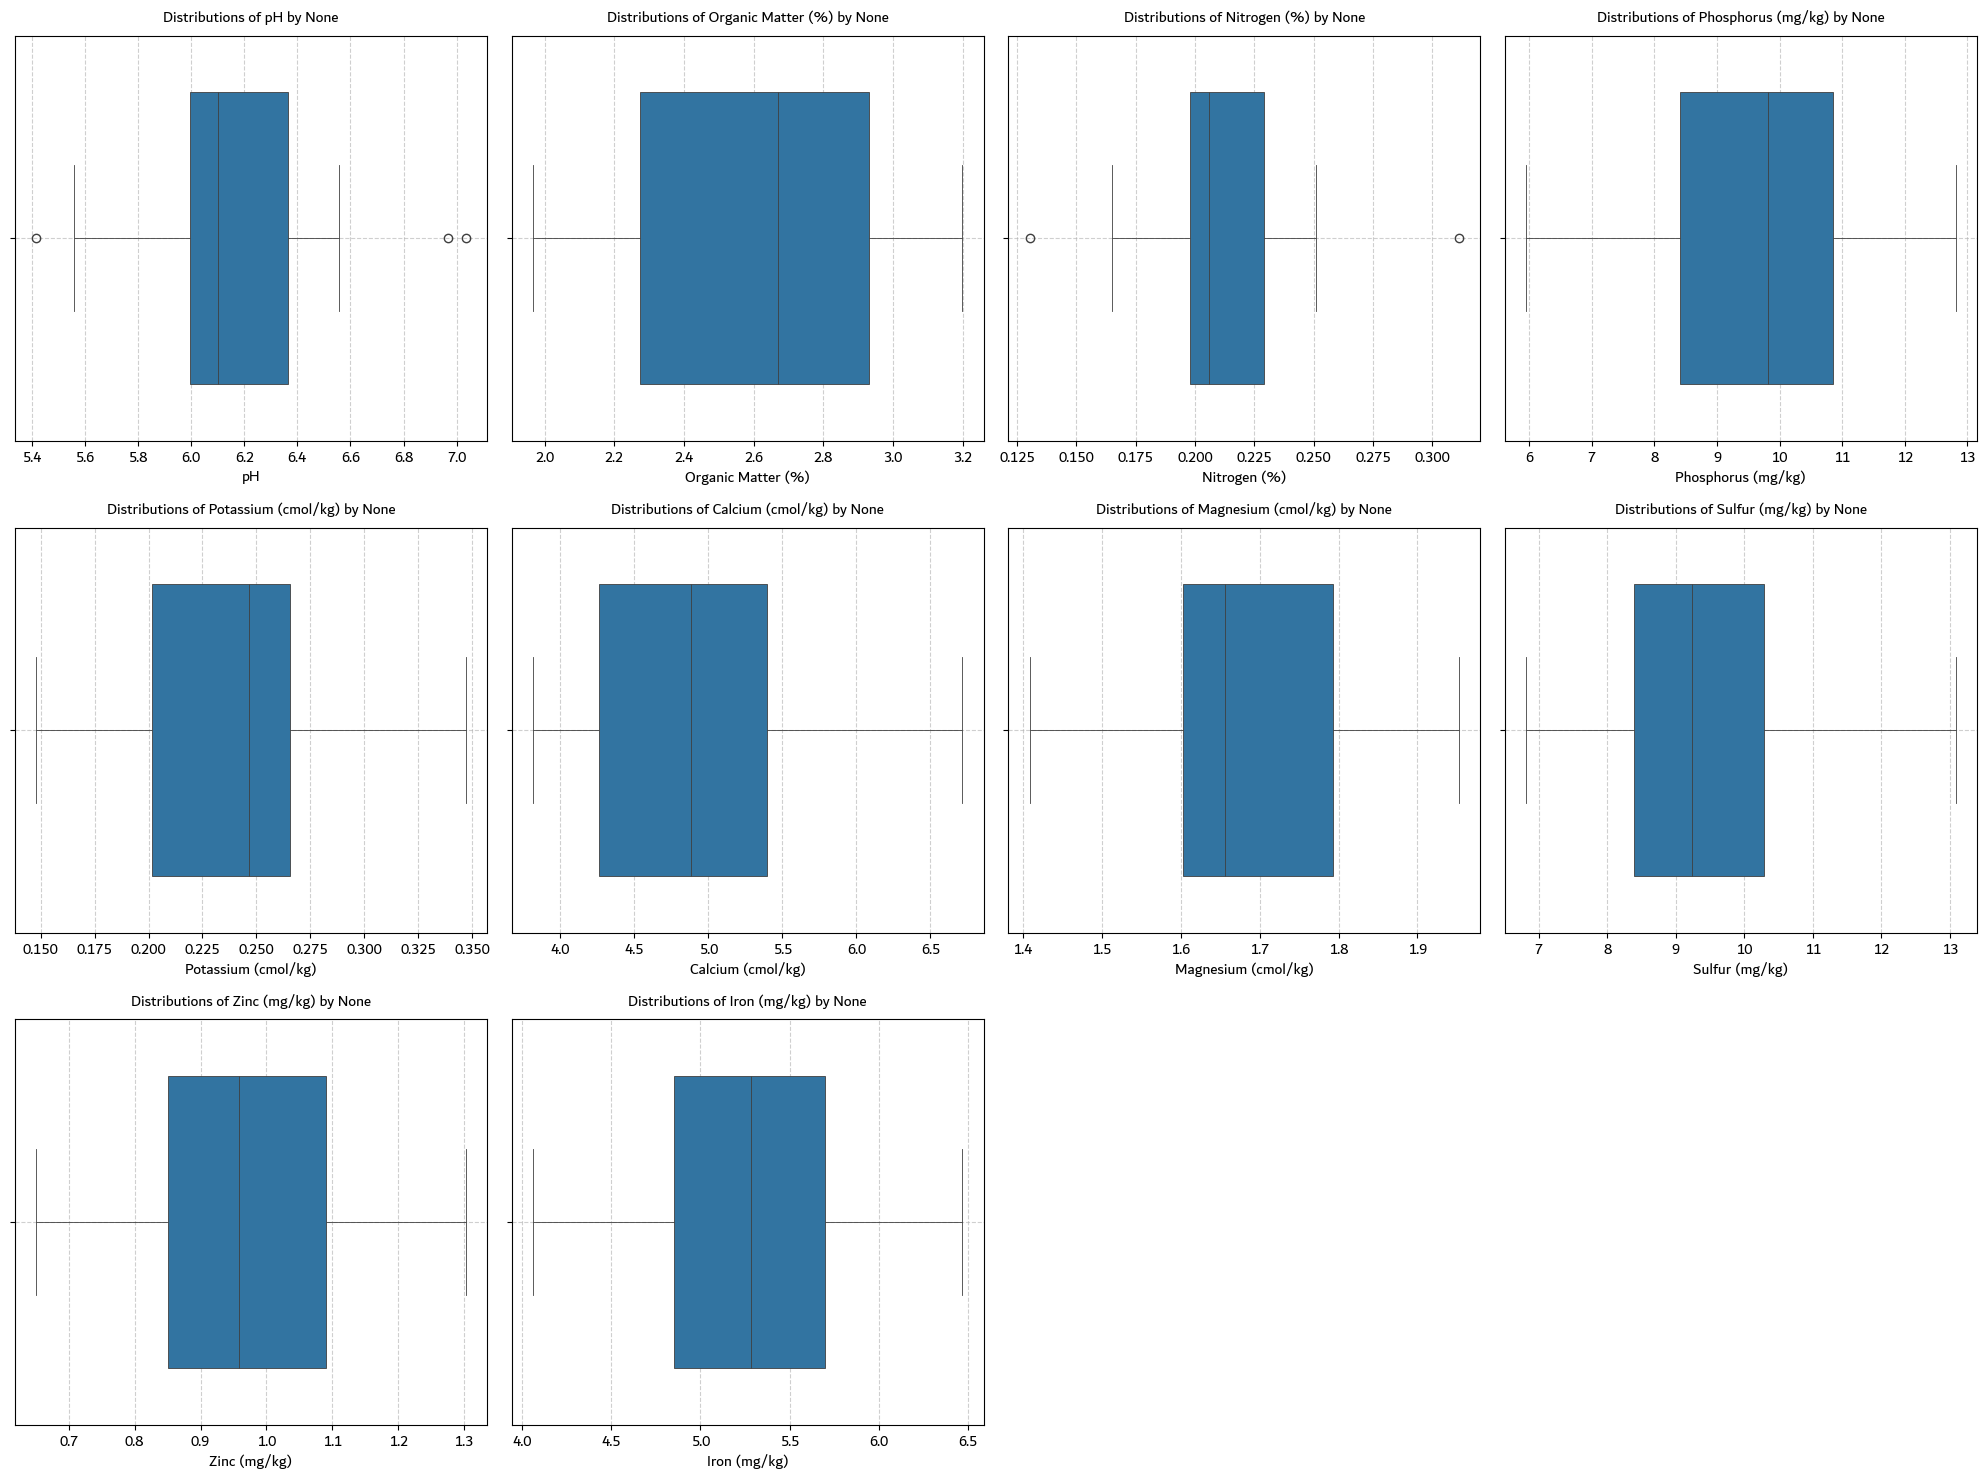

In [61]:
def Boxplot(df, Variables, group=None):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 4)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.boxplot(data=df, x=df[column], fill=True, gap=0.1, ax=axes[idx], hue=group, linewidth=0.6)   
        axes[idx].set_title(f"Distributions of {column} by {group}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
        #axes[idx].legend(frameon=False)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns
Boxplot(df, Variables=Variables)

<h4 style='font-size: 15px; color: blue;  font-weight: 600'>4.2.2: Explore Outlier Anomalies Using the IQR Method</h4>

Now, let’s explore outliers in our data using the Interquartile Range (IQR) method. This approach helps us identify extreme values by checking which data points fall far below or above the typical range for each variable. By detecting these anomalies, both overall and within groups, we can better understand the data’s variability and decide if any values need closer attention or cleaning.

In [58]:
from Scripts.outlier_handling import outlier_detection_iqr
outliers_overall = outlier_detection_iqr(df)
print(outliers_overall.T)

                     Overall
pH                         3
Organic Matter (%)         0
Nitrogen (%)               2
Phosphorus (mg/kg)         0
Potassium (cmol/kg)        0
Calcium (cmol/kg)          0
Magnesium (cmol/kg)        0
Sulfur (mg/kg)             0
Zinc (mg/kg)               0
Iron (mg/kg)               0
Total Observations        30


The current implementation only returns the counts and proportions of outliers in the dataset, but it doesn’t show which specific groups those outliers belong to. To get a clearer picture, we can create plots that compare outlier distributions across groups, helping us identify which groups are most affected.

In [60]:
outliers_by_region = outlier_detection_iqr(df, group_col="Plot")
print(outliers_by_region.T)

Plot                 Plot 1  Plot 2  Plot 3  Plot 4
pH                        1       0       0       1
Organic Matter (%)        2       0       0       0
Nitrogen (%)              0       1       1       0
Phosphorus (mg/kg)        0       0       0       0
Potassium (cmol/kg)       0       0       1       0
Calcium (cmol/kg)         0       0       1       0
Magnesium (cmol/kg)       0       0       0       1
Sulfur (mg/kg)            0       0       0       0
Zinc (mg/kg)              0       2       0       0
Iron (mg/kg)              0       0       0       0
Total Observations        5       6       9      10


<h2 style='font-size: 17px; font-weight: 600'>4.3: Statistic Description of The Datasets</h2>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [62]:
summary_stats = df.describe().T.reset_index()
summary_stats

,index,count,mean,std,...,25%,50%,75%,max
0,pH,30.00,6.17,0.35,...,5.99,6.10,6.36,7.03
1,Organic Matter (%),30.00,2.61,0.36,...,2.27,2.67,2.93,3.20
2,Nitrogen (%),30.00,0.21,0.03,...,0.20,0.21,0.23,0.31
3,Phosphorus (mg/kg),30.00,9.73,1.80,...,8.41,9.82,10.85,12.81
4,Potassium (cmol/kg),30.00,0.24,0.05,...,0.20,0.25,0.27,0.35
5,Calcium (cmol/kg),30.00,4.90,0.69,...,4.26,4.88,5.40,6.71
6,Magnesium (cmol/kg),30.00,1.68,0.15,...,1.60,1.66,1.79,1.95
7,Sulfur (mg/kg),30.00,9.47,1.61,...,8.40,9.23,10.28,13.08
8,Zinc (mg/kg),30.00,0.97,0.17,...,0.85,0.96,1.09,1.30
9,Iron (mg/kg),30.00,5.26,0.58,...,4.85,5.28,5.70,6.47


<h4 style='font-size: 15px; font-weight: 600'>4.3.1:  Distribution of Continuous variables</h4>

Let’s explore the distribution of continuous variables in our dataset by examining key statistics. The **Mean** gives us the average value, while the **Median** provides the middle value, offering a more robust measure against outliers. The **Mode** identifies the most frequent value. **Standard Deviation** and **Variance** show how much the data deviates from the mean, with larger values indicating greater spread. The **Range** reveals the difference between the maximum and minimum values, while **Skewness** measures the symmetry of the distribution. Lastly, **Kurtosis** tells us about the presence of outliers by analyzing the "tailedness" of the distribution. Together, these metrics give us a comprehensive view of how the data is distributed and guide us in identifying any potential issues like skewness or outliers.

In [63]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis


        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

pd.set_option('display.max_columns', 10) 
Continuous_variables_distribution = compute_overall_distribution_stats(df)
Continuous_variables_distribution

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,pH,6.17,6.10,5.42,0.35,0.13,1.62,0.41,0.54
1,Organic Matter (%),2.61,2.67,1.97,0.36,0.13,1.23,-0.26,-1.22
2,Nitrogen (%),0.21,0.21,0.13,0.03,0.00,0.18,0.45,2.19
3,Phosphorus (mg/kg),9.73,9.82,5.96,1.80,3.25,6.86,0.09,-0.53
4,Potassium (cmol/kg),0.24,0.25,0.15,0.05,0.00,0.20,0.12,-0.42
5,Calcium (cmol/kg),4.90,4.88,3.82,0.69,0.48,2.90,0.30,-0.16
6,Magnesium (cmol/kg),1.68,1.66,1.41,0.15,0.02,0.54,-0.18,-0.92
7,Sulfur (mg/kg),9.47,9.23,6.82,1.61,2.58,6.27,0.42,-0.48
8,Zinc (mg/kg),0.97,0.96,0.65,0.17,0.03,0.65,0.06,-0.83
9,Iron (mg/kg),5.26,5.28,4.06,0.58,0.34,2.41,-0.05,-0.43


<h4 style='font-size: 15px; font-weight: 600'>4.3.3: Visual Distribution</h4>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

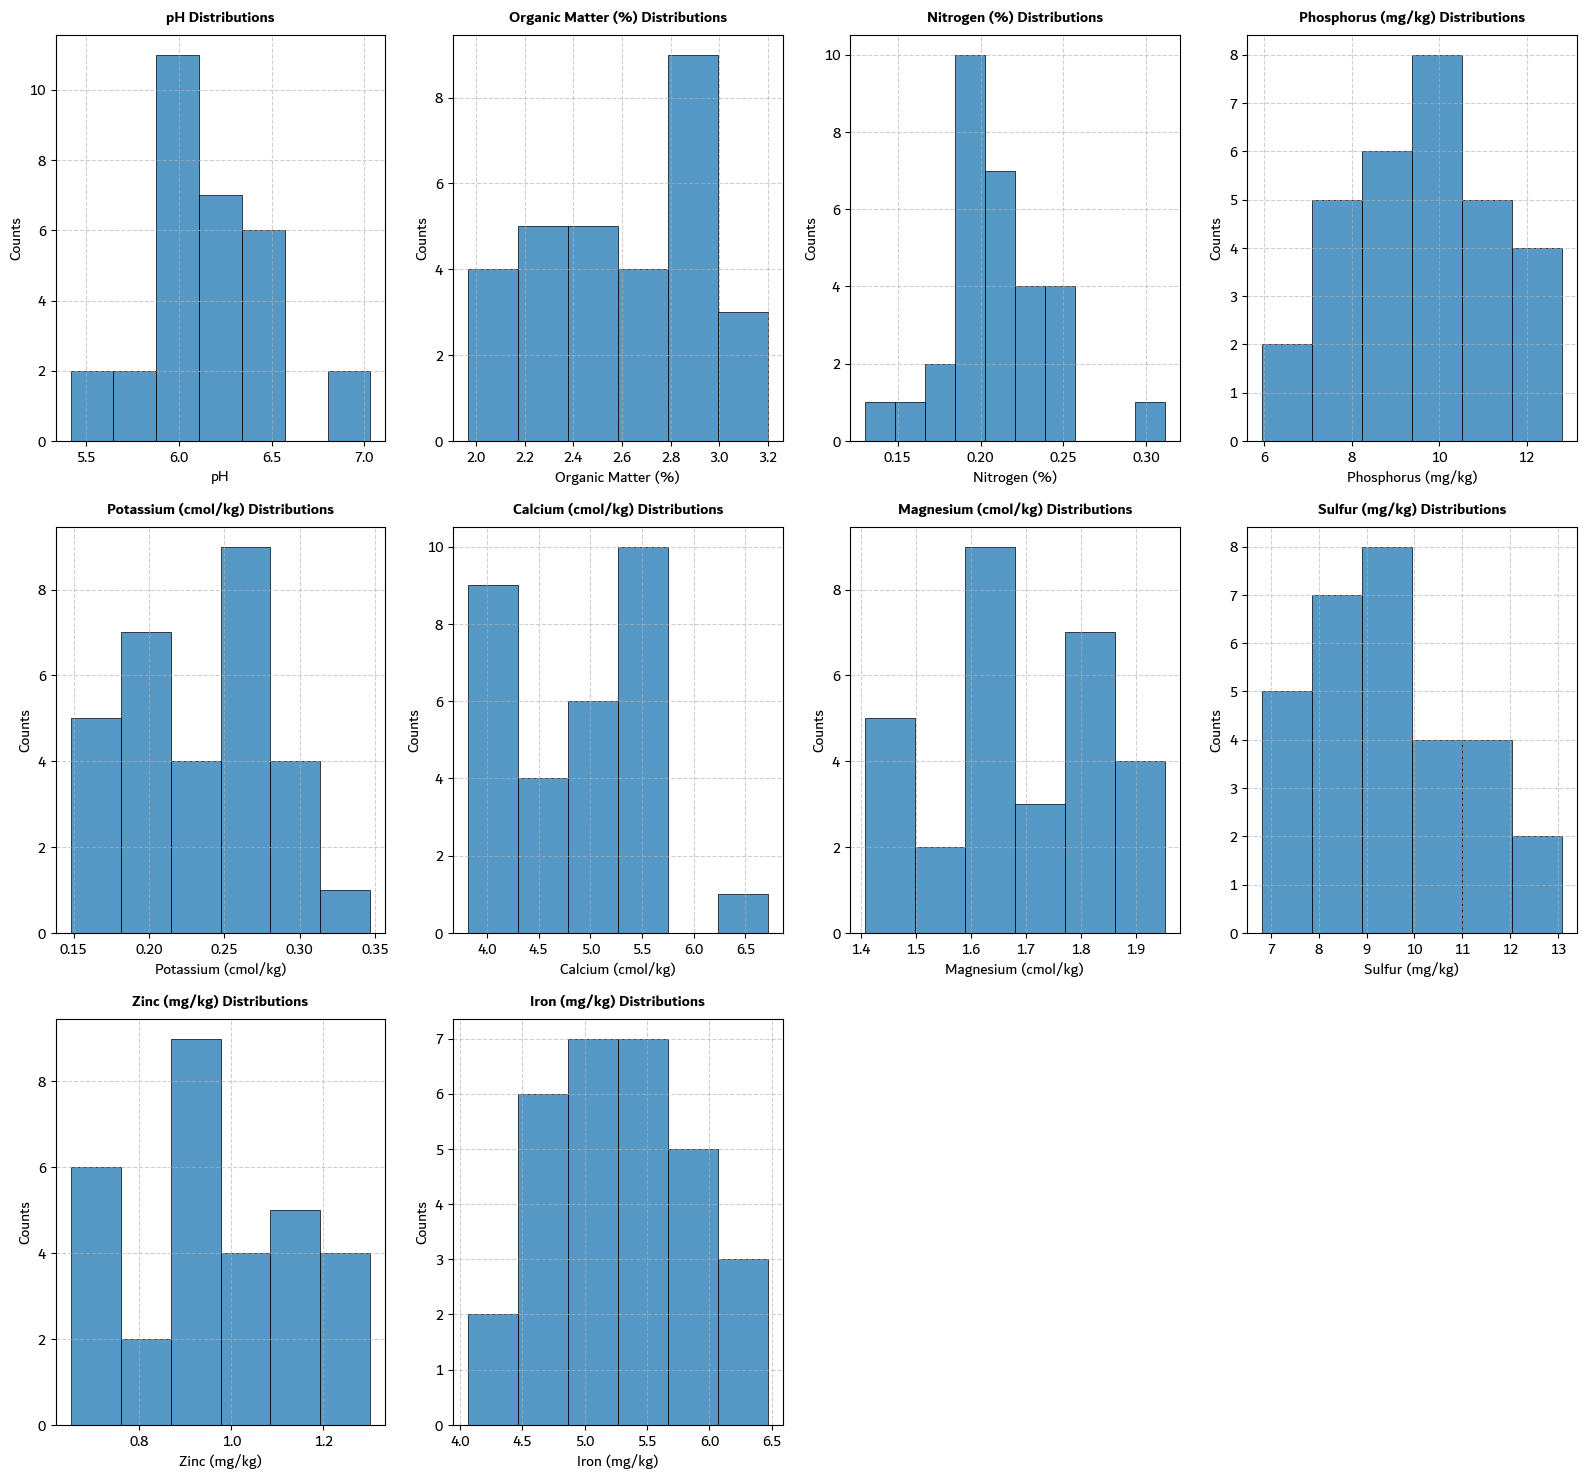

In [64]:
Metrics = df.select_dtypes(include=[np.number]).columns
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 4)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    sns.histplot(data=df, x=df[column], fill=True, ax=axes[idx], linewidth=0.5)   
    axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

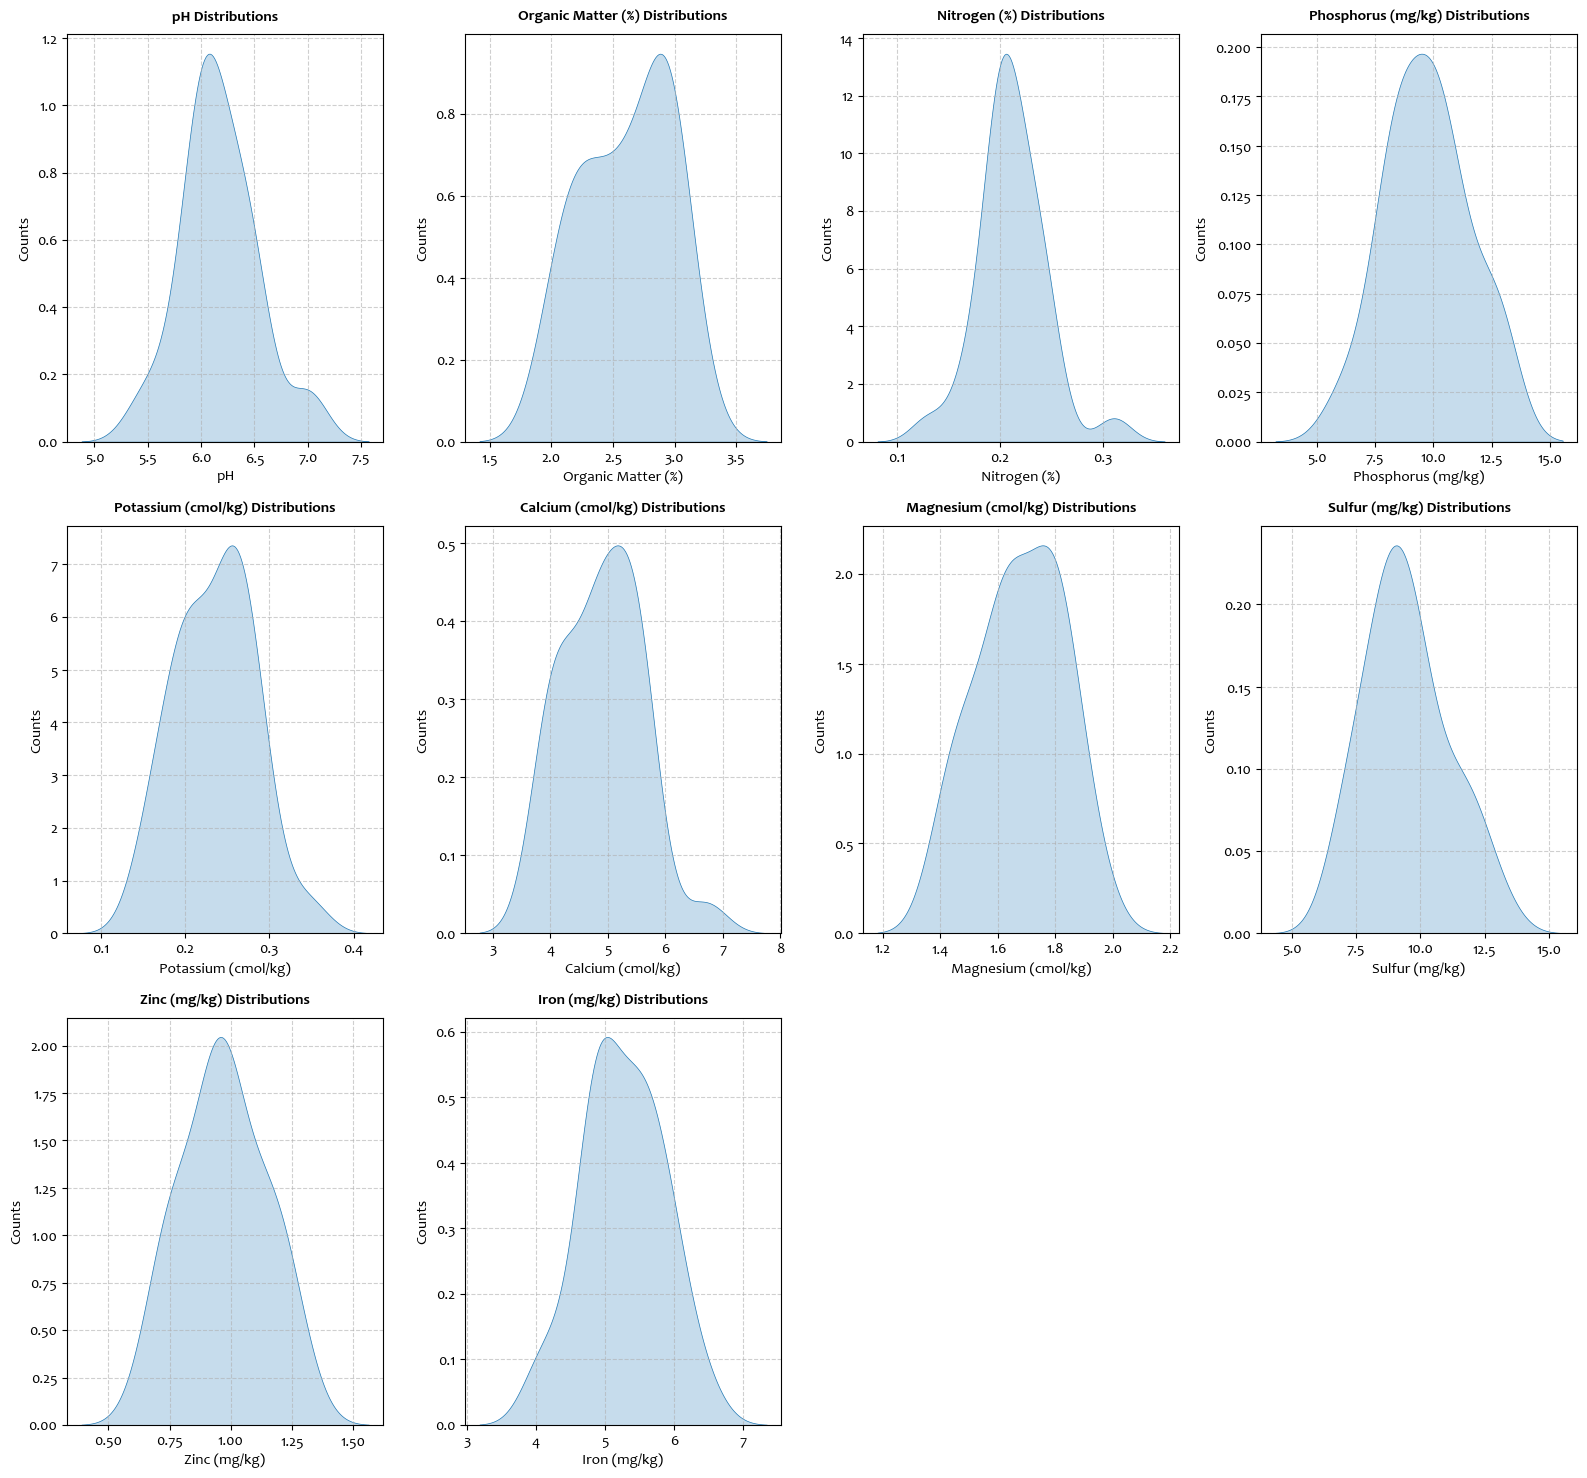

In [65]:
Metrics = df.select_dtypes(include=[np.number]).columns
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 4)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    sns.kdeplot(data=df, x=df[column], fill=True, ax=axes[idx], linewidth=0.5)   
    axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

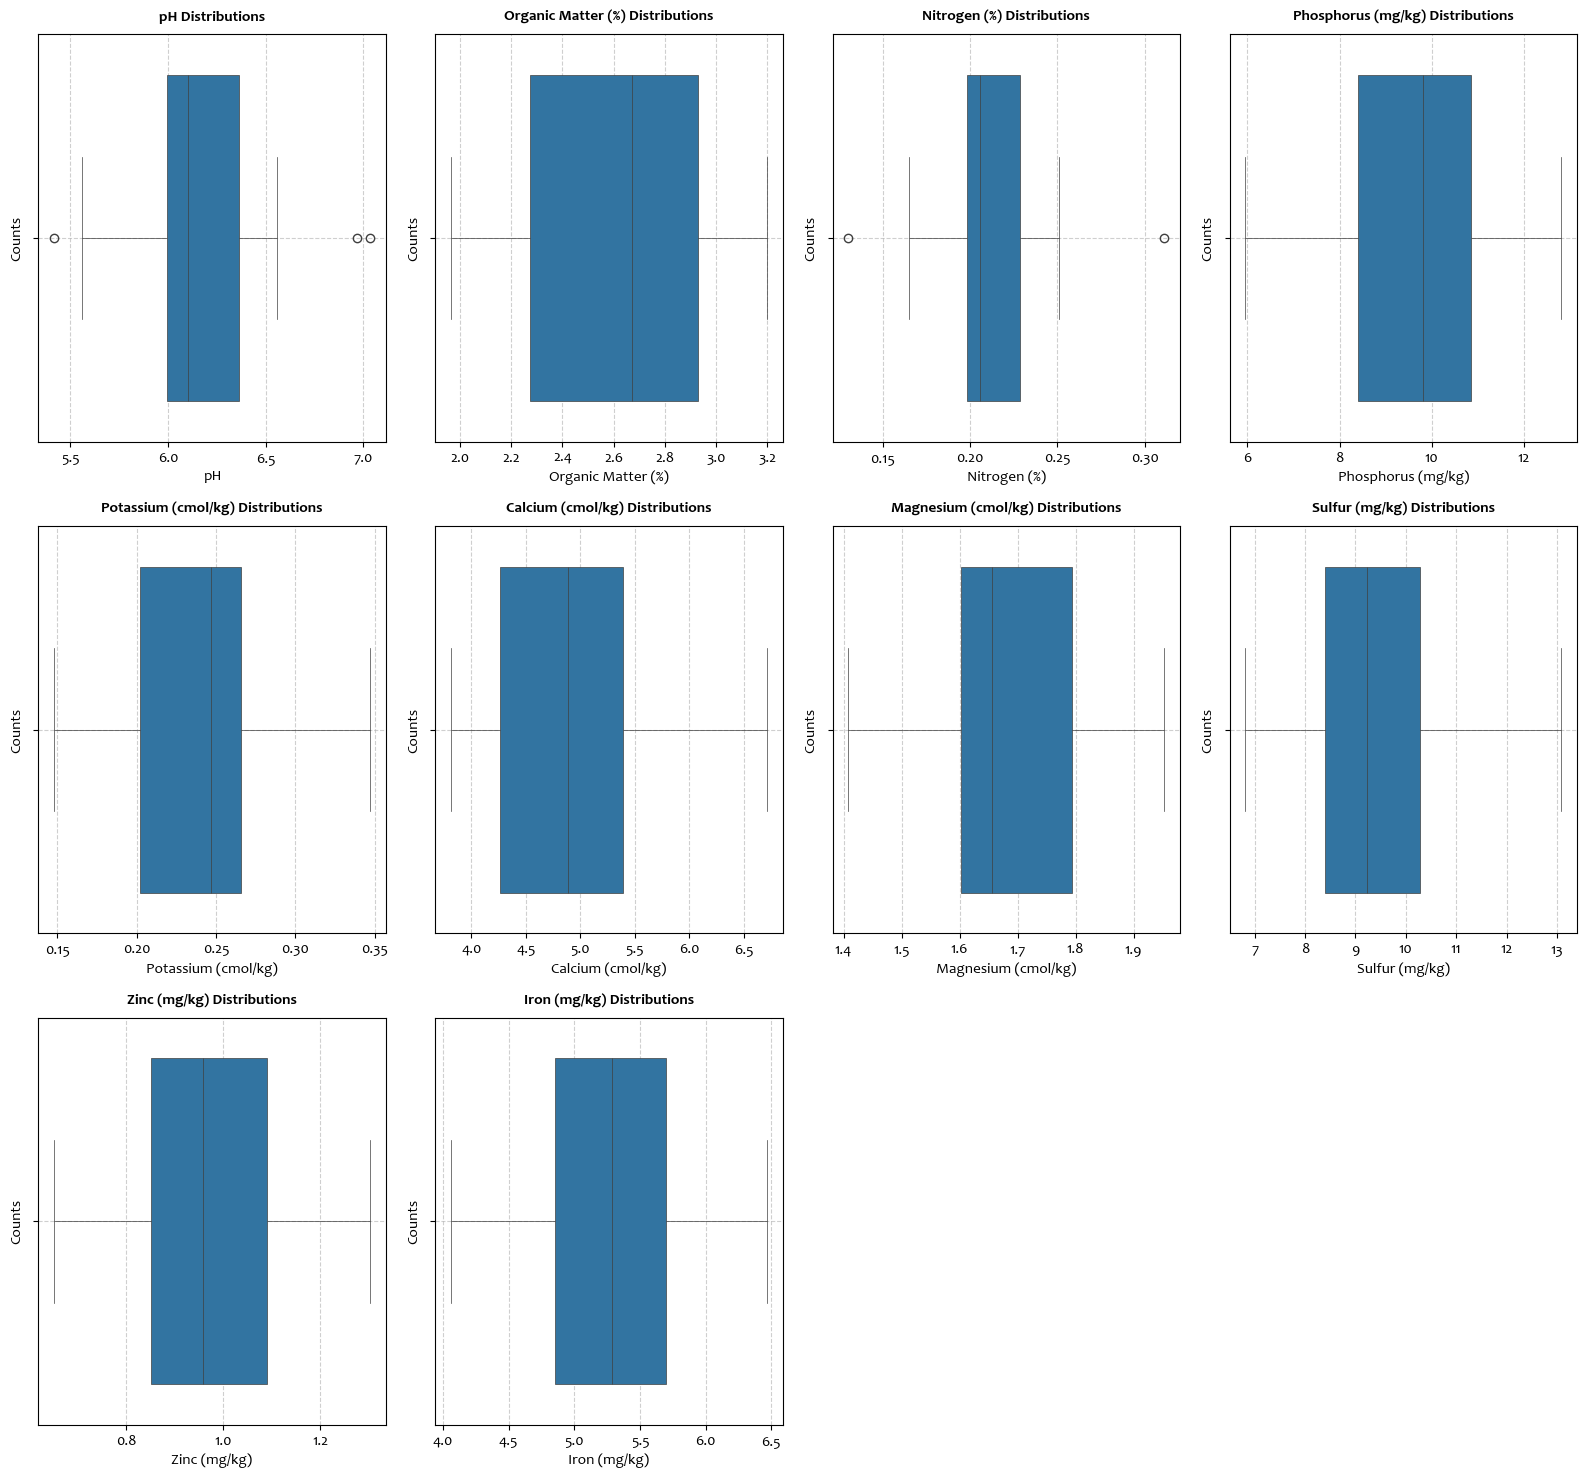

In [66]:
Metrics = df.select_dtypes(include=[np.number]).columns
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 4)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    sns.boxplot(data=df, x=df[column], fill=True, ax=axes[idx], linewidth=0.5)   
    axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h2 style='font-size: 17px;  font-weight: 600'>4.4: Correllation Analysis</h2>

Now, let’s explore the relationships between soil parameters to see how they relate and associate with one another. This step helps us uncover patterns, correlations, or dependencies between variables, providing a clearer foundation for interpreting our upcoming statistical analyses and drawing meaningful insights.


<h4 style='font-size: 15px;  font-weight: 600'>4.4.1: Correlation Coefficients </h4>

In [80]:
def compute_correlation_matrix(df, method="pearson", visualize=True):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Invalid method. Choose from 'pearson', 'spearman', or 'kendall'.")
    
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr(method=method)
    
    return corr_matrix


correlation_matrix = compute_correlation_matrix(df, method="pearson")
pd.set_option('display.max_columns', 9)
correlation_matrix

,pH,Organic Matter (%),Nitrogen (%),Phosphorus (mg/kg),...,Magnesium (cmol/kg),Sulfur (mg/kg),Zinc (mg/kg),Iron (mg/kg)
pH,1.00,0.37,0.08,-0.18,...,-0.12,0.21,0.10,-0.05
Organic Matter (%),0.37,1.00,-0.32,0.30,...,0.09,0.09,-0.03,-0.11
Nitrogen (%),0.08,-0.32,1.00,0.04,...,-0.19,0.02,0.17,-0.41
Phosphorus (mg/kg),-0.18,0.30,0.04,1.00,...,0.12,-0.14,0.09,0.03
Potassium (cmol/kg),-0.04,-0.26,0.03,0.13,...,0.13,0.08,0.10,0.21
Calcium (cmol/kg),-0.11,0.01,-0.18,0.04,...,-0.22,0.03,0.12,0.15
Magnesium (cmol/kg),-0.12,0.09,-0.19,0.12,...,1.00,0.01,-0.27,0.01
Sulfur (mg/kg),0.21,0.09,0.02,-0.14,...,0.01,1.00,-0.14,-0.28
Zinc (mg/kg),0.10,-0.03,0.17,0.09,...,-0.27,-0.14,1.00,-0.22
Iron (mg/kg),-0.05,-0.11,-0.41,0.03,...,0.01,-0.28,-0.22,1.00


<h4 style='font-size: 15px; font-weight: 600'>4.4.2: Correlation Coefficients Heatmap </h4>

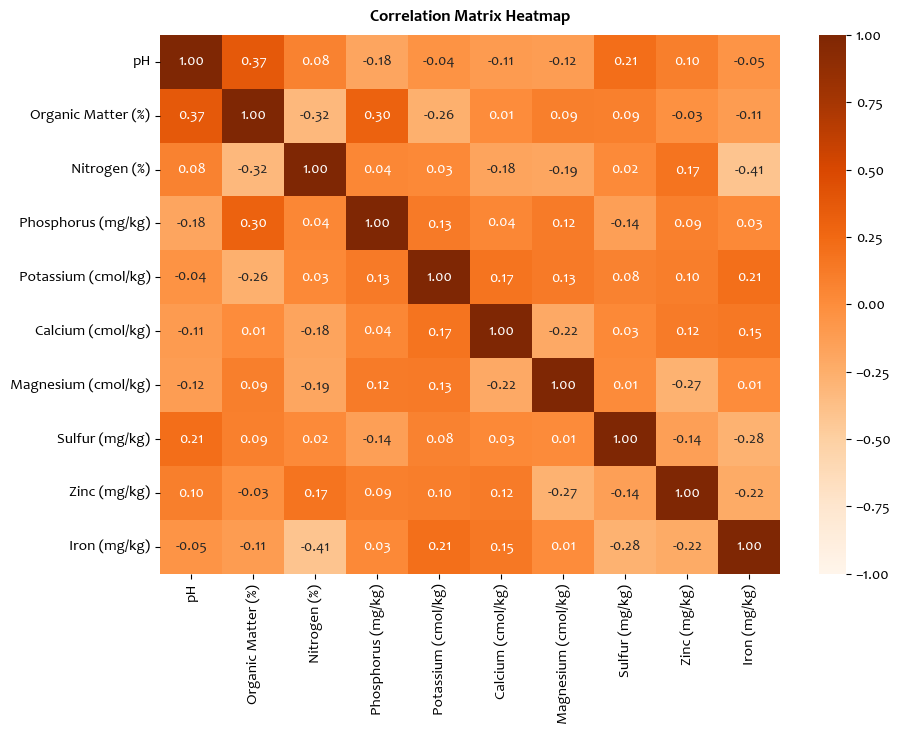

In [68]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight='bold', pad=10)
plt.grid(False)
plt.show()

<h3 style='font-size: 18px; font-family: Colonna MT; font-weight: 600'>8.3: Pearson’s</h3>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [40]:
from scipy.stats import pearsonr

def compute_pearson_r(df, numerical_columns):
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

Variables = df.select_dtypes(include=[np.number]).columns
pearson_results_df = compute_pearson_r(df, Variables)
pearson_results_df.sample(10)

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
7,pH,Zinc (mg/kg),0.10,0.62,Positive,Weak
32,Potassium (cmol/kg),Sulfur (mg/kg),0.08,0.69,Positive,Weak
10,Organic Matter (%),Phosphorus (mg/kg),0.30,0.11,Positive,Weak
31,Potassium (cmol/kg),Magnesium (cmol/kg),0.13,0.50,Positive,Weak
38,Calcium (cmol/kg),Iron (mg/kg),0.15,0.44,Positive,Weak
29,Phosphorus (mg/kg),Iron (mg/kg),0.03,0.87,Positive,Weak
5,pH,Magnesium (cmol/kg),-0.12,0.52,Negative,Weak
22,Nitrogen (%),Zinc (mg/kg),0.17,0.36,Positive,Weak
25,Phosphorus (mg/kg),Calcium (cmol/kg),0.04,0.82,Positive,Weak
0,pH,Organic Matter (%),0.37,0.04,Positive,Moderate


<h1 style='font-size: 20px;  font-weight: 600'>5.0: Parametictic Test Assumption Validation</h1>

Before we advance to hypothesis testing — specifically the one-sample t-test — it's important to first check whether our variables meet the assumptions required for parametric tests, particularly **normality**. To do this, we’ll use the **Shapiro-Wilk test**, which helps us assess if the distribution of each variable is close to normal. This step ensures the validity of our statistical tests and guides us in choosing the right analysis methods.


In [69]:
def ShapirowilkTest(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) == 0:
        raise ValueError("No numerical columns found in the DataFrame.")
    
    results = []
    for col in numerical_cols:
        stat, p_value = shapiro(df[col])
        results.append({
            'Variable': col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })
    
    results_df = pd.DataFrame(results)
    
    return results_df

shapiro_results = ShapirowilkTest(df)
display(shapiro_results)

,Variable,Statistic,P-Value,Normality
0,pH,0.96,0.39,Normally Distributed
1,Organic Matter (%),0.94,0.08,Normally Distributed
2,Nitrogen (%),0.94,0.10,Normally Distributed
3,Phosphorus (mg/kg),0.97,0.51,Normally Distributed
4,Potassium (cmol/kg),0.98,0.77,Normally Distributed
5,Calcium (cmol/kg),0.96,0.24,Normally Distributed
6,Magnesium (cmol/kg),0.96,0.40,Normally Distributed
7,Sulfur (mg/kg),0.97,0.56,Normally Distributed
8,Zinc (mg/kg),0.97,0.65,Normally Distributed
9,Iron (mg/kg),0.98,0.81,Normally Distributed


<h1 style='font-size: 18px;'>6.0: Hypothesis Testing (One-Sample t-Test)</h1>

Now, let’s dive into the core of our analysis — hypothesis testing using a one-sample t-test — to assess whether the soil parameters we've measured truly align with the recommended standards for healthy crop growth. For each parameter (such as nitrogen, phosphorus, pH, etc.), we’ll formulate two hypotheses: the **null hypothesis (H₀)** assumes that the average value matches the ideal agronomic level, while the **alternative hypothesis (H₁)** suggests a significant difference, indicating a potential issue. In simple terms, we’re asking: *Does the average value we found reflect what’s best for crops?* To answer this, we’ll perform a t-test that compares each observed mean to its standard reference value. If a statistically significant difference is detected, it means the deviation is unlikely due to random chance, signaling that specific soil properties may need interventions like nutrient adjustments, pH correction, or organic matter enhancement to support optimal crop performance.

<h4 style='font-size: 15px;'>6.1: One-Sample t-Test</h4>

Now, we’ll perform the t-test for each parameter. This test will compare the average value we observed to the standard reference value. If we find a statistically significant difference, it means that the variation we’re seeing is unlikely to be due to random chance. This is our signal that the soil property in question may require management — maybe a boost in nutrients, pH adjustment, or organic matter improvement.

In [7]:
def one_sample_t_test(df, columns, population_means, alpha=0.05):
    results = []
    for col in columns:
        if col in df.columns and col in population_means:
            sample_data = df[col].dropna()
            pop_mean = population_means[col]
            
            t_stat, p_value = ttest_1samp(sample_data, pop_mean)
            mean_diff = sample_data.mean() - pop_mean
            interpretation = "Significant" if p_value < alpha else "Not Significant"
            
            results.append({
                "Parameter": col,
                "Sample Mean": sample_data.mean(),
                "Recommended Mean": pop_mean,
                "Mean Difference": mean_diff,
                "T-Statistic": t_stat,
                "P-Value": p_value,
                "Significance": interpretation
            })
    return pd.DataFrame(results)

# Recommended agronomic values
recommended_values = {
    "pH": 6.5,
    "Organic Matter (%)": 3.0,  # in %
    "Nitrogen (%)": 0.2,        # in %
    "Phosphorus (mg/kg)": 15.0,     # in mg/kg
    "Potassium (cmol/kg)": 0.2,       # in cmol/kg
    "Calcium (cmol/kg)": 5.0,         # in cmol/kg
    "Magnesium (cmol/kg)": 1.5,       # in cmol/kg
    "Sulfur (mg/kg)": 10.0,         # in mg/kg
    "Zinc (mg/kg)": 1.0,            # in mg/kg
    #"Iron (mg/kg)": 5.0             # in mg/kg
}

results_df = one_sample_t_test(df, df.columns, recommended_values)
results_df

,Parameter,Sample Mean,Recommended Mean,Mean Difference,T-Statistic,P-Value,Significance
0,pH,6.17,6.50,-0.33,-5.12,0.00,Significant
1,Organic Matter (%),2.61,3.00,-0.39,-5.91,0.00,Significant
2,Nitrogen (%),0.21,0.20,0.01,1.92,0.06,Not Significant
3,Phosphorus (mg/kg),9.73,15.00,-5.27,-16.02,0.00,Significant
4,Potassium (cmol/kg),0.24,0.20,0.04,4.13,0.00,Significant
5,Calcium (cmol/kg),4.90,5.00,-0.10,-0.83,0.41,Not Significant
6,Magnesium (cmol/kg),1.68,1.50,0.18,6.49,0.00,Significant
7,Sulfur (mg/kg),9.47,10.00,-0.53,-1.79,0.08,Not Significant
8,Zinc (mg/kg),0.97,1.00,-0.03,-0.95,0.35,Not Significant


<h4 style='font-size: 15px;'>6.2: Results Table</h4>

The table below presents the results of the one-sample t-tests, showing the sample means, hypothesized agronomic values, test statistics, p-values, and conclusions—clearly identifying which soil parameters significantly differ from recommended benchmarks.

In [8]:
display(results_df)

,Parameter,Sample Mean,Recommended Mean,Mean Difference,T-Statistic,P-Value,Significance
0,pH,6.17,6.50,-0.33,-5.12,0.00,Significant
1,Organic Matter (%),2.61,3.00,-0.39,-5.91,0.00,Significant
2,Nitrogen (%),0.21,0.20,0.01,1.92,0.06,Not Significant
3,Phosphorus (mg/kg),9.73,15.00,-5.27,-16.02,0.00,Significant
4,Potassium (cmol/kg),0.24,0.20,0.04,4.13,0.00,Significant
5,Calcium (cmol/kg),4.90,5.00,-0.10,-0.83,0.41,Not Significant
6,Magnesium (cmol/kg),1.68,1.50,0.18,6.49,0.00,Significant
7,Sulfur (mg/kg),9.47,10.00,-0.53,-1.79,0.08,Not Significant
8,Zinc (mg/kg),0.97,1.00,-0.03,-0.95,0.35,Not Significant


<h1 style='font-size: 18px;'>7.0: Visual Explorations</h1>

To gain a more intuitive understanding of how each soil parameter compares to its recommended value, we visualize the results using bar plots. These plots make it easier to identify which parameters deviate noticeably and help highlight statistically significant differences at a glance.


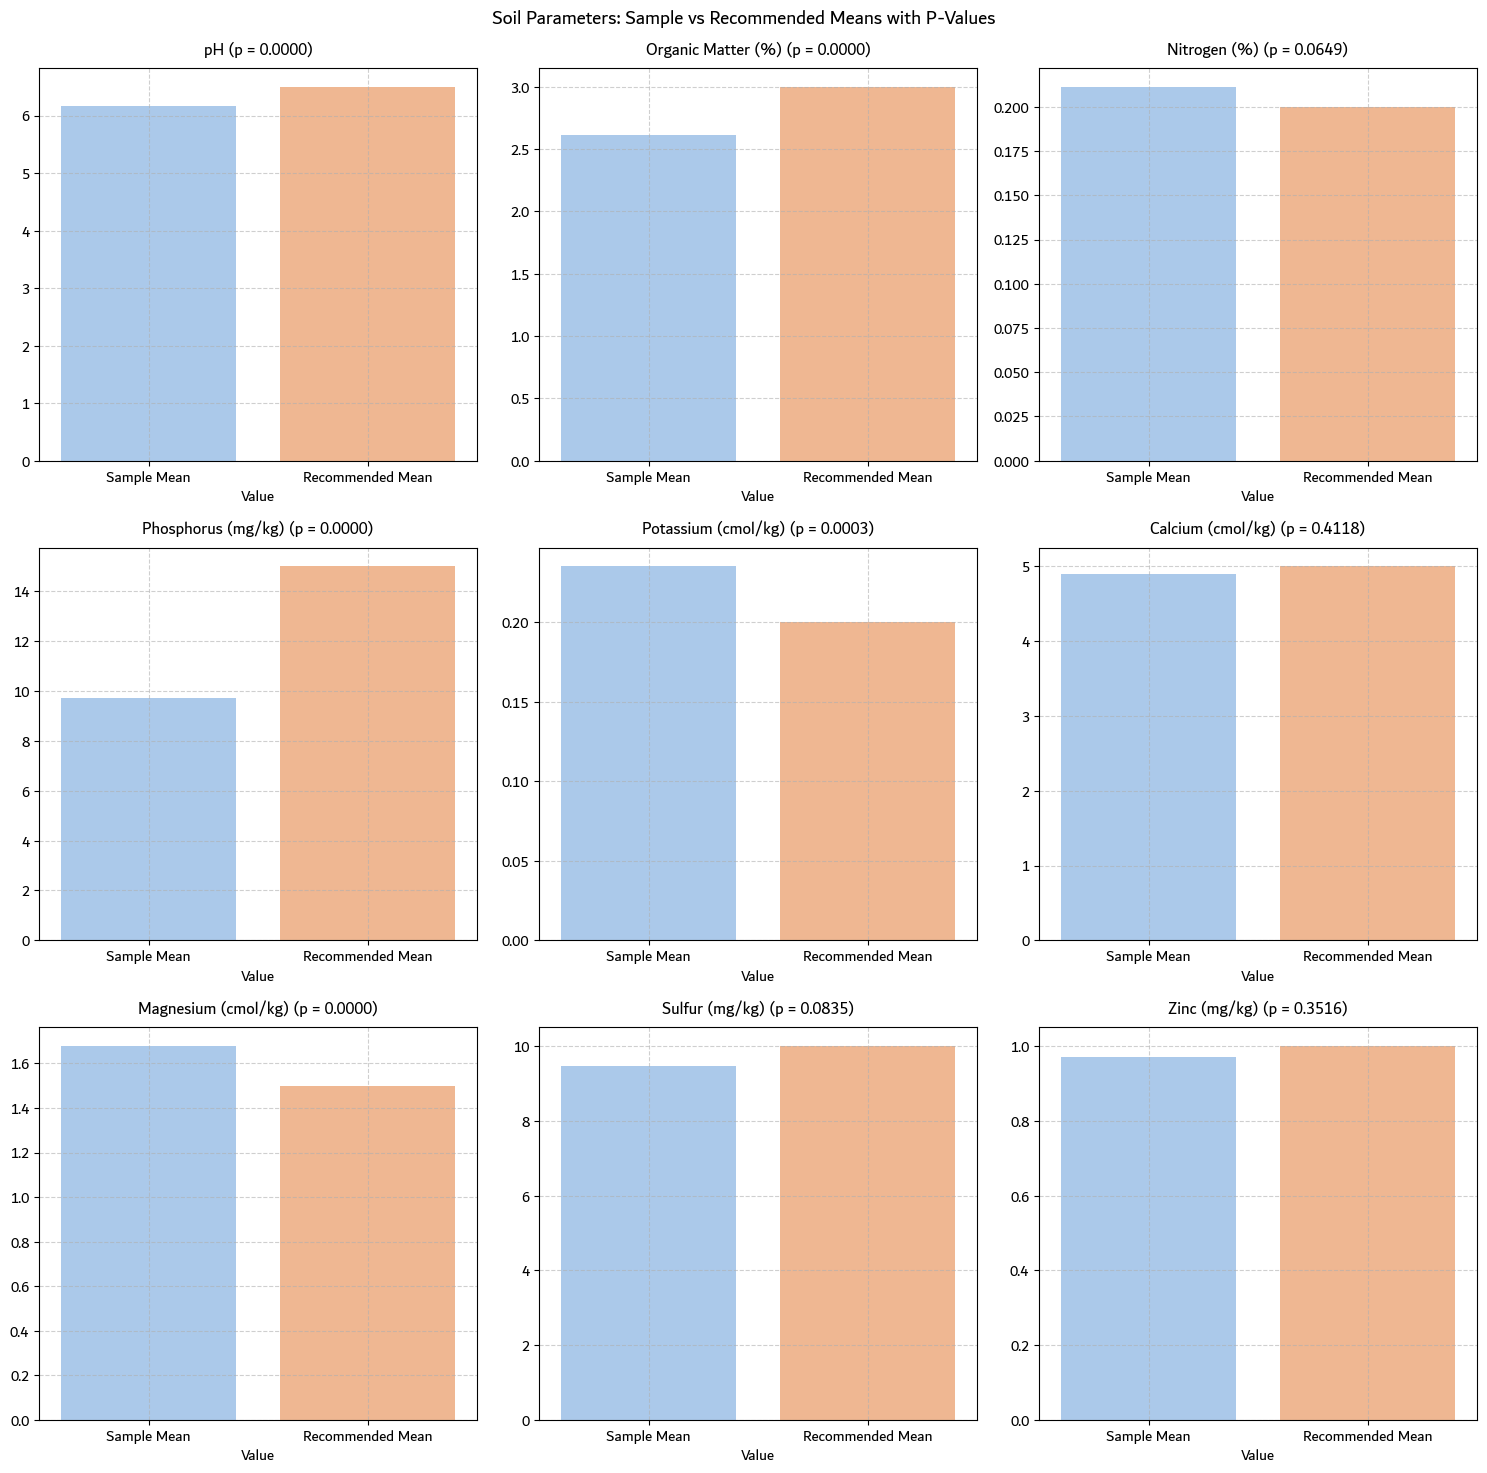

In [72]:
def reshape_results_for_facet_plot(results_df):
    melted = pd.melt(
        results_df,
        id_vars=["Parameter", "P-Value", "Significance"],
        value_vars=["Sample Mean", "Recommended Mean"],
        var_name="Type",
        value_name="Value"
    )
    return melted

def plot_variable_distributions_with_pvalues(data, group_col="Parameter", p_col="P-Value"):
    Variables = data[group_col].unique()
    num_variables = len(Variables)
    
    cols = 3
    rows = math.ceil(num_variables / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.size': 11})
    axes = axes.flatten() if num_variables > 1 else [axes]

    for idx, variable in enumerate(Variables):
        subset = data[data[group_col] == variable]
        
        # Extract unique p-value for this parameter
        p_val = subset[p_col].dropna().unique()
        p_val_str = f" (p = {p_val[0]:.4f})" if len(p_val) > 0 else ""

        sns.barplot(
            data=subset,
            y="Value", x="Type",
            ax=axes[idx],
            hue = 'Type',
            palette="pastel",
            linewidth=0.6,
            alpha=1
        )

        axes[idx].set_title(f"{variable}{p_val_str}", fontsize=12, pad=10)
        axes[idx].set_xlabel("Value")
        axes[idx].set_ylabel("")
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].legend_.remove() if axes[idx].get_legend() else None

    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.suptitle("Soil Parameters: Sample vs Recommended Means with P-Values", fontsize=14)
    plt.show()

# Example usage:
data = reshape_results_for_facet_plot(results_df)
plot_variable_distributions_with_pvalues(data)


<h1 style='font-size: 18px;'>8.0: Key Insights</h1>


The one-sample t-test analysis reveals several important insights into the current state of soil health relative to agronomic recommendations:

* **Significant Deficiencies Identified:**

  * **Soil pH** and **Organic Matter (%)** are both significantly lower than recommended values, indicating potential acidity and reduced organic content, which may negatively affect maize growth and microbial activity.
  * **Phosphorus (mg/kg)** shows a substantial shortfall from the recommended level, with the largest mean difference of -5.27. This phosphorus deficiency could critically limit root development and overall crop productivity.

* **Excesses That Are Statistically Significant:**

  * **Potassium (cmol/kg)** and **Magnesium (cmol/kg)** are both significantly higher than their targets. While sufficient potassium and magnesium can be beneficial, excessive amounts may lead to nutrient imbalances and antagonistic effects on other essential elements.

* **Parameters Close to Target Without Significant Difference:**

  * **Nitrogen (%), Calcium (cmol/kg), Sulfur (mg/kg),** and **Zinc (mg/kg)** show no statistically significant deviations from their respective benchmarks, suggesting these nutrients are within acceptable agronomic ranges in the sampled soils.



---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions.

---

<h5 style='font-size: 65px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>